<a href="https://colab.research.google.com/github/seantma/ztdl-masterclasses/blob/master/notebooks/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learn with us: www.zerotodeeplearning.com

Copyright © 2021: Zero to Deep Learning ® Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Transfer Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# sports_images_path = tf.keras.utils.get_file(
#     'sports_images',
#     'https://archive.org/download/ztdl_sports_images/sports_images.tgz',
#      untar=True)

In [2]:
![[ ! -f sports_images.tar.gz ]] && gsutil cp gs://ztdl-datasets/sports_images.tar.gz .
![[ ! -d sports_images ]] && echo "Extracting images..." && tar zxf sports_images.tar.gz
sports_images_path  = './sports_images'

Copying gs://ztdl-datasets/sports_images.tar.gz...
\ [1 files][  1.6 GiB/  1.6 GiB]   43.6 MiB/s                                   
Operation completed over 1 objects/1.6 GiB.                                      
Extracting images...


In [3]:
train_path = os.path.join(sports_images_path, 'train')
test_path = os.path.join(sports_images_path, 'test')

In [4]:
batch_size = 32
img_size = 299

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
base_model = Xception(include_top=False,
                      weights='imagenet',
                      input_shape=(img_size, img_size, 3),
                      pooling='avg')

83697664/83683744 [==============================] - 1s 0us/step


In [14]:
from tensorflow.keras.utils import plot_model
base_model.plot_model()

AttributeError: ignored

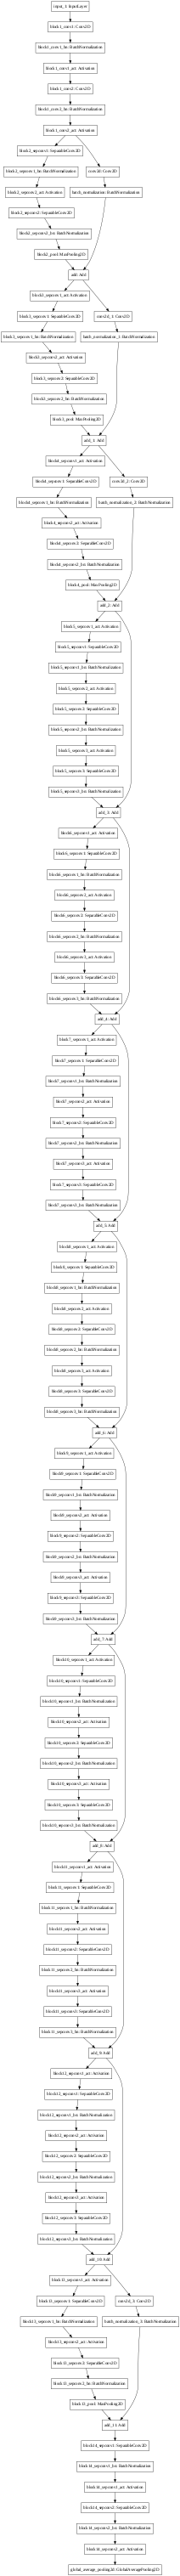

In [19]:
plot_model(base_model, dpi=24)

In [ ]:
full_model = Xception()

In [7]:
model = Sequential([
    base_model,
    Dense(20, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.layers[0].trainable = False

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense (Dense)                (None, 20)                40980     
Total params: 20,902,460
Trainable params: 40,980
Non-trainable params: 20,861,480
_________________________________________________________________


In [10]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [11]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode = 'sparse',
    shuffle=True)

Found 11414 images belonging to 20 classes.


In [20]:
model.fit(train_generator,
          epochs=1,
          steps_per_epoch=len(train_generator))

357/357 [==============================] - 892s 2s/step - loss: 0.5142 - accuracy: 0.8432


In [22]:
batch, labels = train_generator.next()

In [25]:
batch[0].shape

(299, 299, 3)

In [26]:
features = base_model(batch)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


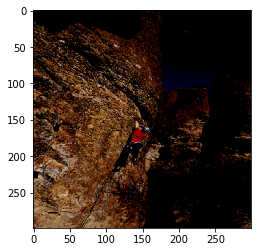

In [27]:
plt.imshow(batch[0])

In [29]:
labels[0]

13.0

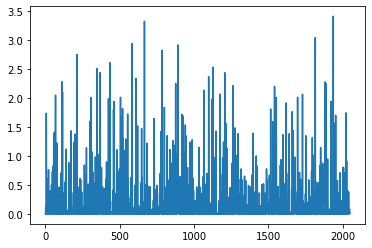

In [28]:
plt.plot(features[0])

### Exercise 1:

Improve the model above

- Insert a few more layers between the `base_model` and the output `Dense` layer. You could include:
    - Additional `Dense` layers
    - `Dropout` layers
    - `BatchNormalization` layers
    
    ```python
    model = Sequential([
        base_model,
        # YOUR CODE HERE
        Dense(20, activation='softmax')
    ])
    ```
- Compile the model
- Freeze the `base_model` weights
- Fit the model on the `train_generator`

- Define a new `test_generator` using the `test_path` and a `batch_size` of 500 and use it to create test batch:
    ```python
    test_generator = datagen.flow_from_directory(
        # YOUR CODE HERE
    )
    
    X_test, y_test = test_generator.next()
    ```
- Generate predictions on the test batch (these will be probabilities) and use the `.argmax()` function to extract the predicted classes
- Evaluate your predictions using the `classification_report` and `confusion_matrix`

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
### Exercise 2: Tensorflow Hub

Pre-trained models can also be found on [TensorFlow Hub](https://www.tensorflow.org/hub)

They can be loaded by providing the appropriate link to the `hub.KerasLayer` layer.

- Load the model provided here: https://tfhub.dev/google/bit/m-r50x3/1 into a Keras layer, call it `base_model_2`
- Define a new transfer learning model like the previous one and check that it trains correctly on the train generator
- You may have to adapt the generator with the following preprocessing function: `lambda x:(x/127.5) - 1`

In [ ]:
import tensorflow_hub as hub